In [3]:
#libraries 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
df = pd.read_csv("final3.0.csv", encoding = "unicode_escape" )

In [5]:
df.head()

,BENZOL WASHER INLET GAS TEMP,BENZOL WASHER INLET OIL TEMP,RICH OIL FLOW(M3/hr),DISTILLATION COLUMN MIDDLE TEMP,STEAM FLOW TO REGENERATOR (T/hr),STEAM TEMP TO REGENERTOR,DISTILLATION COLUMN TOP TEMP,DISTILLATION COLUMN BOTTOM TEMP,PRODUCTION (TON),PRODUCT TEMP,PIPEHEATER MIDDLE TEMP,STEAM INLET TEMP TO PIPEHEATER
0,NaN,27.58,65.39,°C,2.41,340.52,94.27,168.22,26.09,36.29,390.58,133.11
1,27.58,27.39,65.58,97.12,2.41,341.95,94.3,168.92,27.43,36.2,392.79,134.12
2,27.39,27.59,65.43,99.59,2.4,339.89,94.29,168.18,26.01,35.32,391.8,134.66
3,27.59,28.11,65.46,97.03,2.33,338.7,94.03,167.7,25.11,36.4,391.7,135.75
4,28.11,28.6,65.09,95.6,2.37,339,94.3,167,25.29,36.3,387.9,135.33


In [6]:
df.isnull().sum()

BENZOL WASHER INLET GAS TEMP         1
BENZOL WASHER  INLET OIL TEMP        1
RICH OIL FLOW(M3/hr)                 1
DISTILLATION COLUMN MIDDLE TEMP     83
STEAM FLOW TO REGENERATOR (T/hr)     1
STEAM TEMP TO REGENERTOR             1
DISTILLATION COLUMN TOP TEMP         1
DISTILLATION COLUMN BOTTOM TEMP      1
PRODUCTION (TON)                     1
PRODUCT TEMP                         1
PIPEHEATER MIDDLE TEMP               1
STEAM INLET TEMP TO PIPEHEATER       1
dtype: int64

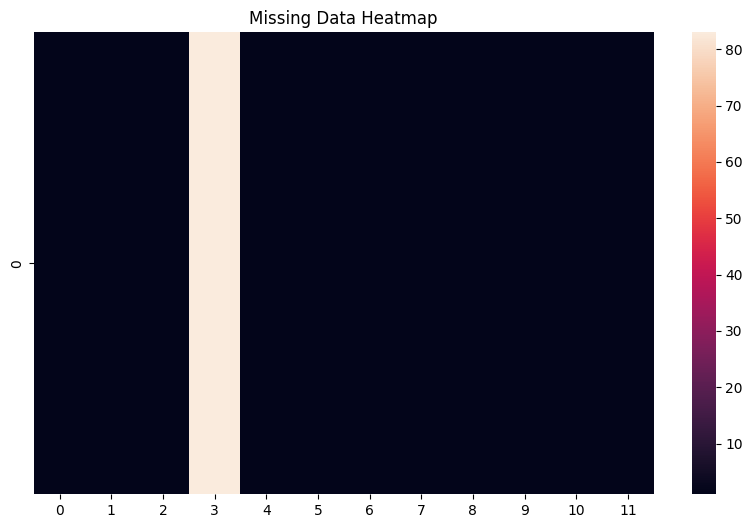

In [7]:
# Assuming df is your DataFrame
data = df.isnull().sum().values.reshape(1, -1)  # Reshape to a 2D matrix

plt.figure(figsize=(10, 6))
sns.heatmap(data)
plt.title('Missing Data Heatmap')
plt.show()


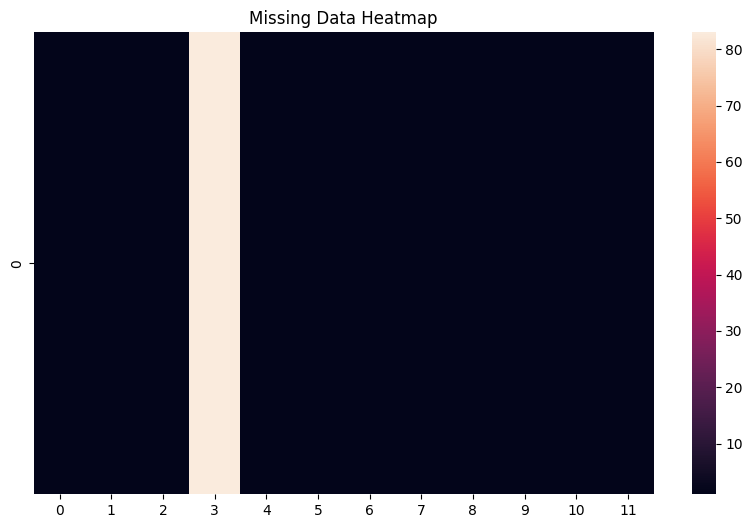

In [8]:
 #Assuming df is your DataFrame
data = df.isnull().sum().values.reshape(1, -1)  # Reshape to a 2D matrix

plt.figure(figsize=(10, 6))
sns.heatmap(data)
plt.title('Missing Data Heatmap')
plt.show()


In [9]:
column_name1 = "DISTILLATION COLUMN MIDDLE TEMP"

# Convert the column to numeric and handle non-numeric values
df[column_name1] = pd.to_numeric(df[column_name1], errors='coerce')

# Calculate the mean and fill missing values with it
mean1 = df[column_name1].mean()
df[column_name1].fillna(mean1, inplace=True)

In [10]:
for i in df.columns :
    
    df[i] = pd.to_numeric(df[i], errors='coerce')
    
    mean1 = df[i].mean()
    df[i].fillna(mean1, inplace=True)
    
    

In [11]:
df.isnull().sum()

BENZOL WASHER INLET GAS TEMP        0
BENZOL WASHER  INLET OIL TEMP       0
RICH OIL FLOW(M3/hr)                0
DISTILLATION COLUMN MIDDLE TEMP     0
STEAM FLOW TO REGENERATOR (T/hr)    0
STEAM TEMP TO REGENERTOR            0
DISTILLATION COLUMN TOP TEMP        0
DISTILLATION COLUMN BOTTOM TEMP     0
PRODUCTION (TON)                    0
PRODUCT TEMP                        0
PIPEHEATER MIDDLE TEMP              0
STEAM INLET TEMP TO PIPEHEATER      0
dtype: int64

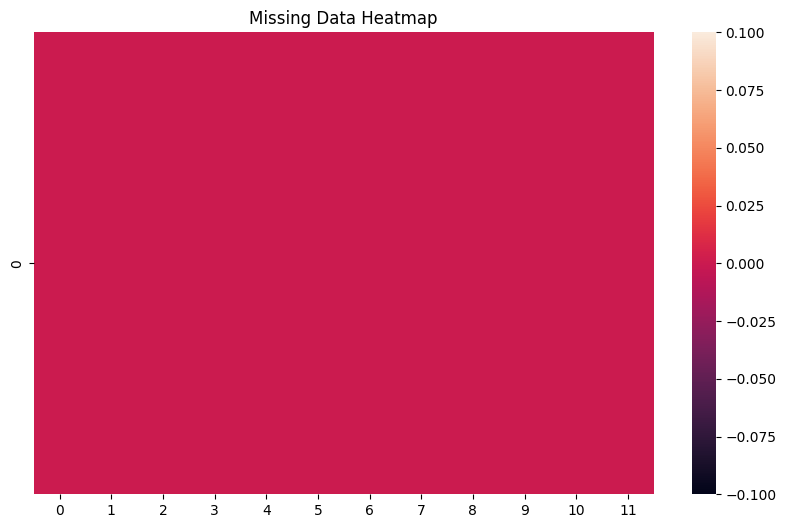

In [12]:
 #Assuming df is your DataFrame
data = df.isnull().sum().values.reshape(1, -1)  # Reshape to a 2D matrix

plt.figure(figsize=(10, 6))
sns.heatmap(data)
plt.title('Missing Data Heatmap')
plt.show()


In [13]:
df1 = df["PRODUCTION (TON)"] > 2

df9 = df[df1]

In [14]:
df9.describe()

,BENZOL WASHER INLET GAS TEMP,BENZOL WASHER INLET OIL TEMP,RICH OIL FLOW(M3/hr),DISTILLATION COLUMN MIDDLE TEMP,STEAM FLOW TO REGENERATOR (T/hr),STEAM TEMP TO REGENERTOR,DISTILLATION COLUMN TOP TEMP,DISTILLATION COLUMN BOTTOM TEMP,PRODUCTION (TON),PRODUCT TEMP,PIPEHEATER MIDDLE TEMP,STEAM INLET TEMP TO PIPEHEATER
count,770.000000,770.000000,770.00000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,24.473684,19.282125,70.79709,93.740900,16.251389,305.889334,92.147210,156.186882,25.959154,32.810782,375.196738,153.217400
std,9.876800,13.148370,234.51875,17.018258,65.865845,94.678052,11.305069,36.818962,4.074623,8.105865,85.367095,42.031145
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.120000,0.000000,0.000000,-48.760000
25%,26.335000,0.000000,62.10250,94.360000,2.350000,331.862500,93.910000,165.150000,25.300000,32.040000,391.305000,146.120000
50%,27.815000,27.240000,64.56000,95.100000,2.390000,339.495000,94.175000,168.000000,26.540000,34.785000,399.980000,148.620000
75%,28.900000,28.692500,65.08000,96.400000,2.410000,345.800000,94.390000,169.475000,27.517500,36.520000,405.730000,151.040000
max,87.700000,87.980000,6479.00000,167.780000,391.990000,399.450000,130.095473,210.730000,50.990000,50.990000,419.400000,391.990000


In [15]:
df.corr()["PRODUCTION (TON)"]

BENZOL WASHER INLET GAS TEMP        0.446713
BENZOL WASHER  INLET OIL TEMP      -0.173334
RICH OIL FLOW(M3/hr)                0.037236
DISTILLATION COLUMN MIDDLE TEMP    -0.075950
STEAM FLOW TO REGENERATOR (T/hr)   -0.512630
STEAM TEMP TO REGENERTOR            0.728643
DISTILLATION COLUMN TOP TEMP       -0.682263
DISTILLATION COLUMN BOTTOM TEMP     0.820663
PRODUCTION (TON)                    1.000000
PRODUCT TEMP                        0.810745
PIPEHEATER MIDDLE TEMP              0.820891
STEAM INLET TEMP TO PIPEHEATER      0.871299
Name: PRODUCTION (TON), dtype: float64

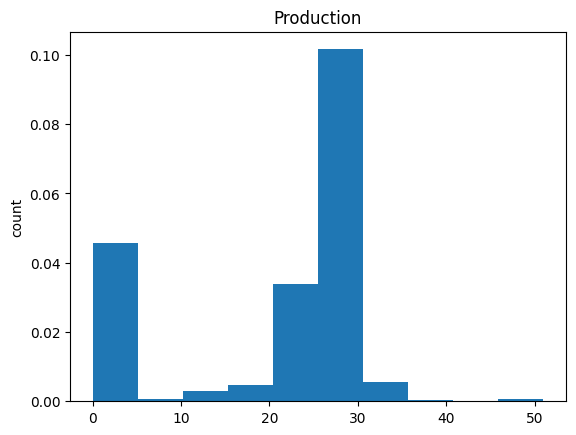

In [16]:
plt.hist(df["PRODUCTION (TON)"],density = True)
plt.title("Production")
plt.ylabel("count")
plt.show()


In [17]:
# Assuming df is your DataFrame
df = df.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
df.corr()

,BENZOL WASHER INLET GAS TEMP,BENZOL WASHER INLET OIL TEMP,RICH OIL FLOW(M3/hr),DISTILLATION COLUMN MIDDLE TEMP,STEAM FLOW TO REGENERATOR (T/hr),STEAM TEMP TO REGENERTOR,DISTILLATION COLUMN TOP TEMP,DISTILLATION COLUMN BOTTOM TEMP,PRODUCTION (TON),PRODUCT TEMP,PIPEHEATER MIDDLE TEMP,STEAM INLET TEMP TO PIPEHEATER
BENZOL WASHER INLET GAS TEMP,1.000000,0.010942,0.011291,-0.064529,-0.353393,0.502731,-0.511380,0.410282,0.446713,0.431245,0.405876,0.486737
BENZOL WASHER INLET OIL TEMP,0.010942,1.000000,0.047259,0.049858,0.235598,-0.034798,0.419018,-0.188536,-0.173334,-0.071064,-0.196499,-0.274136
RICH OIL FLOW(M3/hr),0.011291,0.047259,1.000000,-0.005954,-0.047802,0.061471,0.003340,0.056644,0.037236,0.064549,0.063177,0.012423
DISTILLATION COLUMN MIDDLE TEMP,-0.064529,0.049858,-0.005954,1.000000,0.052861,-0.071845,0.043333,-0.076048,-0.075950,-0.073560,-0.075819,-0.073190
STEAM FLOW TO REGENERATOR (T/hr),-0.353393,0.235598,-0.047802,0.052861,1.000000,-0.683240,0.712699,-0.774502,-0.512630,-0.803216,-0.794605,-0.348731
STEAM TEMP TO REGENERTOR,0.502731,-0.034798,0.061471,-0.071845,-0.683240,1.000000,-0.555599,0.847545,0.728643,0.849823,0.860383,0.628797
DISTILLATION COLUMN TOP TEMP,-0.511380,0.419018,0.003340,0.043333,0.712699,-0.555599,1.000000,-0.634793,-0.682263,-0.635288,-0.645645,-0.715808
DISTILLATION COLUMN BOTTOM TEMP,0.410282,-0.188536,0.056644,-0.076048,-0.774502,0.847545,-0.634793,1.000000,0.820663,0.960139,0.979339,0.713917
PRODUCTION (TON),0.446713,-0.173334,0.037236,-0.075950,-0.512630,0.728643,-0.682263,0.820663,1.000000,0.810745,0.820891,0.871299
PRODUCT TEMP,0.431245,-0.071064,0.064549,-0.073560,-0.803216,0.849823,-0.635288,0.960139,0.810745,1.000000,0.963543,0.681947


<Axes: >

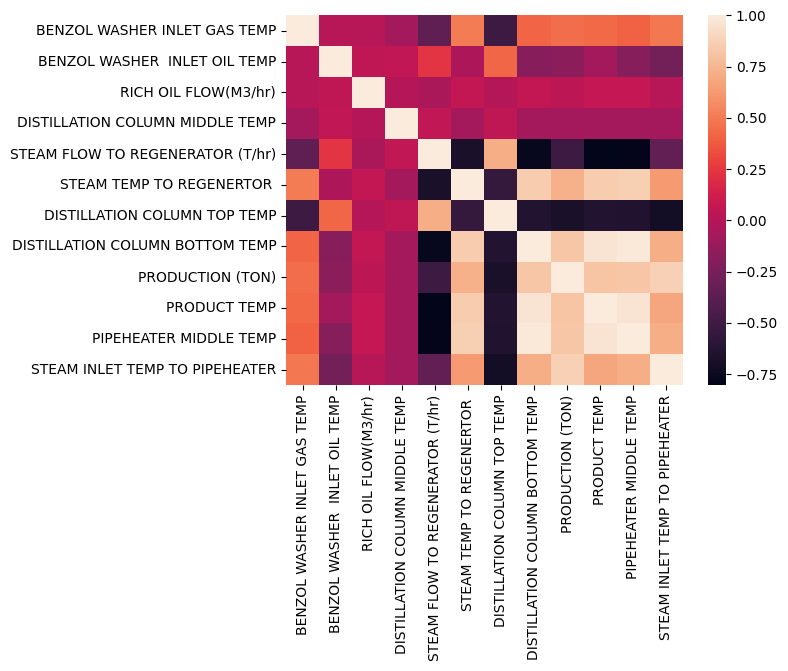

In [18]:
sns.heatmap(df.corr())


In [19]:
(df.corr() > 0.7)["PRODUCTION (TON)"] 

BENZOL WASHER INLET GAS TEMP        False
BENZOL WASHER  INLET OIL TEMP       False
RICH OIL FLOW(M3/hr)                False
DISTILLATION COLUMN MIDDLE TEMP     False
STEAM FLOW TO REGENERATOR (T/hr)    False
STEAM TEMP TO REGENERTOR             True
DISTILLATION COLUMN TOP TEMP        False
DISTILLATION COLUMN BOTTOM TEMP      True
PRODUCTION (TON)                     True
PRODUCT TEMP                         True
PIPEHEATER MIDDLE TEMP               True
STEAM INLET TEMP TO PIPEHEATER       True
Name: PRODUCTION (TON), dtype: bool

TypeError: 'Axes' object is not subscriptable

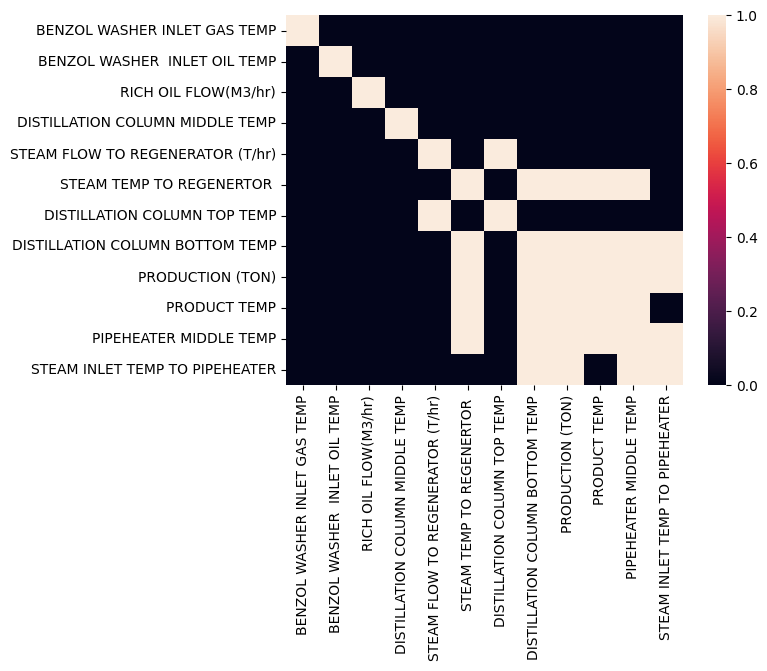

In [20]:
sns.heatmap(df.corr() > 0.7)["PRODUCTION (TON)"]

TypeError: 'Axes' object is not subscriptable

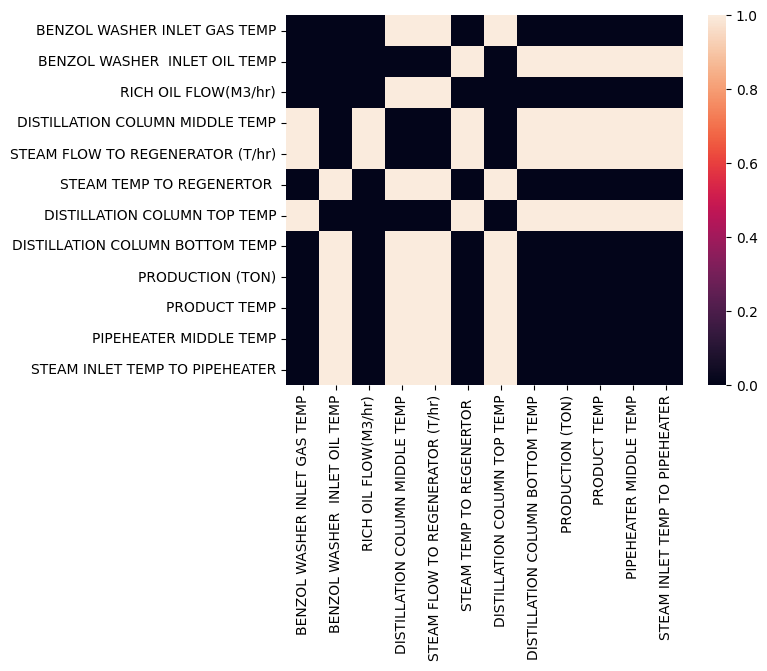

In [21]:
sns.heatmap(df.corr() < 0)["PRODUCTION (TON)"]

In [38]:
#corr > 0

correlation_threshold = 0
correlation_with_production = df.corr()["PRODUCTION (TON)"]
columns_above_threshold = correlation_with_production[correlation_with_production > correlation_threshold].index

df_0 = df[columns_above_threshold]




In [39]:
#corr > 0.7 

correlation_threshold = 0.7
correlation_with_production = df.corr()["PRODUCTION (TON)"]
columns_above_threshold = correlation_with_production[correlation_with_production > correlation_threshold].index

df1 = df[columns_above_threshold]




In [40]:
df1.corr()

,STEAM TEMP TO REGENERTOR,DISTILLATION COLUMN BOTTOM TEMP,PRODUCTION (TON),PRODUCT TEMP,PIPEHEATER MIDDLE TEMP,STEAM INLET TEMP TO PIPEHEATER
STEAM TEMP TO REGENERTOR,1.000000,0.847545,0.728643,0.849823,0.860383,0.628797
DISTILLATION COLUMN BOTTOM TEMP,0.847545,1.000000,0.820663,0.960139,0.979339,0.713917
PRODUCTION (TON),0.728643,0.820663,1.000000,0.810745,0.820891,0.871299
PRODUCT TEMP,0.849823,0.960139,0.810745,1.000000,0.963543,0.681947
PIPEHEATER MIDDLE TEMP,0.860383,0.979339,0.820891,0.963543,1.000000,0.716117
STEAM INLET TEMP TO PIPEHEATER,0.628797,0.713917,0.871299,0.681947,0.716117,1.000000


In [41]:
#corr > 0.5

correlation_threshold = 0.5
correlation_with_production = df.corr()["PRODUCTION (TON)"]
columns_above_threshold = correlation_with_production[correlation_with_production > correlation_threshold].index

df2 = df[columns_above_threshold]




In [42]:
df2.corr()

,STEAM TEMP TO REGENERTOR,DISTILLATION COLUMN BOTTOM TEMP,PRODUCTION (TON),PRODUCT TEMP,PIPEHEATER MIDDLE TEMP,STEAM INLET TEMP TO PIPEHEATER
STEAM TEMP TO REGENERTOR,1.000000,0.847545,0.728643,0.849823,0.860383,0.628797
DISTILLATION COLUMN BOTTOM TEMP,0.847545,1.000000,0.820663,0.960139,0.979339,0.713917
PRODUCTION (TON),0.728643,0.820663,1.000000,0.810745,0.820891,0.871299
PRODUCT TEMP,0.849823,0.960139,0.810745,1.000000,0.963543,0.681947
PIPEHEATER MIDDLE TEMP,0.860383,0.979339,0.820891,0.963543,1.000000,0.716117
STEAM INLET TEMP TO PIPEHEATER,0.628797,0.713917,0.871299,0.681947,0.716117,1.000000


In [43]:
df1.skew()

STEAM TEMP TO REGENERTOR          -0.840582
DISTILLATION COLUMN BOTTOM TEMP   -0.986444
PRODUCTION (TON)                  -0.999648
PRODUCT TEMP                      -0.982708
PIPEHEATER MIDDLE TEMP            -1.021073
STEAM INLET TEMP TO PIPEHEATER    -0.543360
dtype: float64

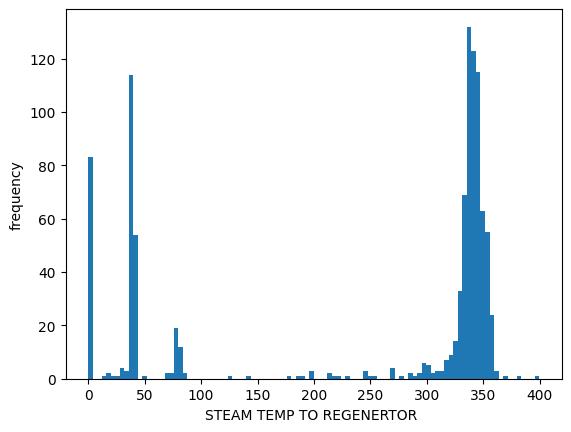

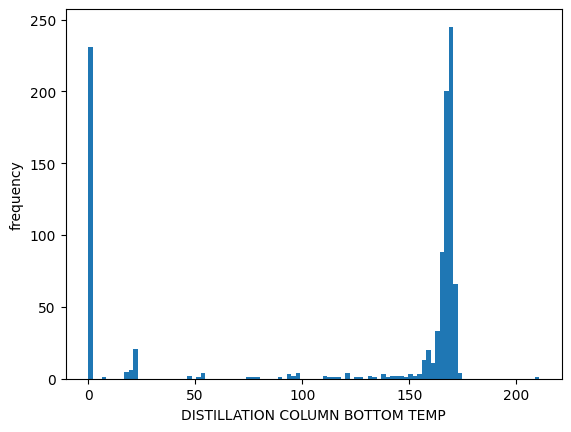

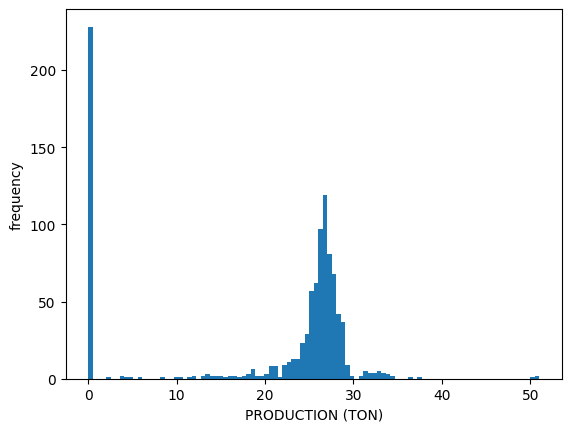

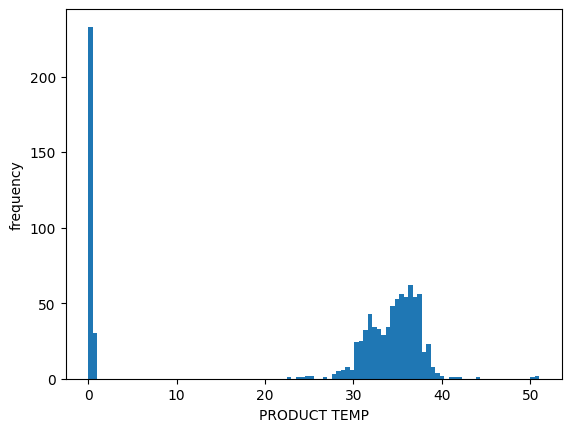

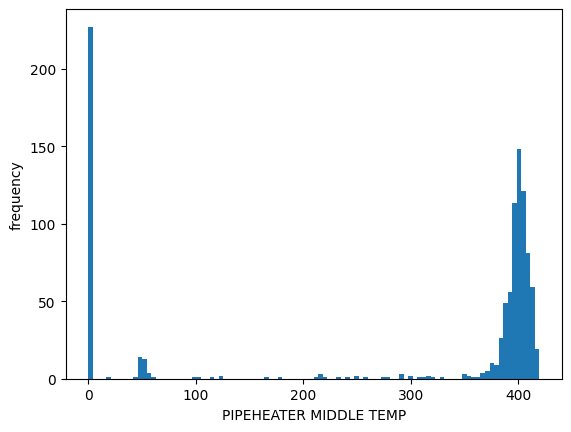

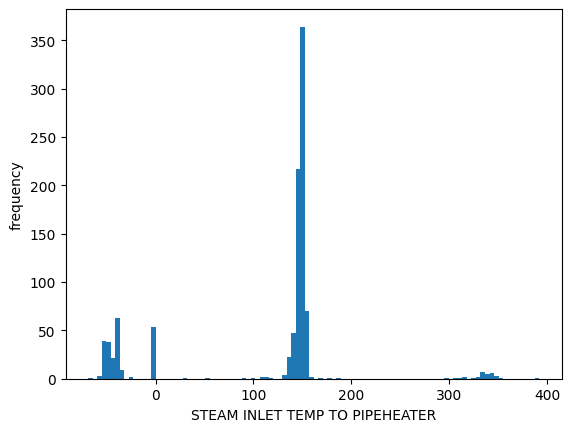

In [44]:
for i in df1 :
    plt.hist(df1[i],bins = 100)
    plt.xlabel(i)
    plt.ylabel("frequency")
    
    plt.show()

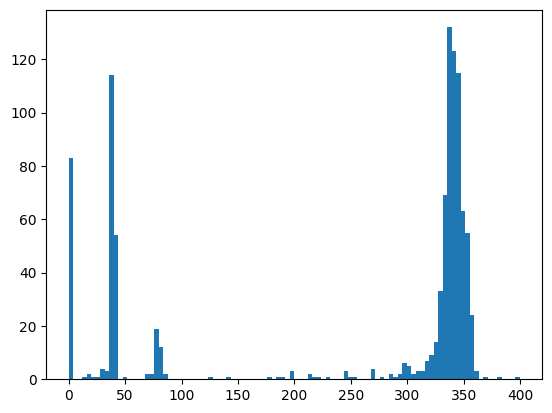

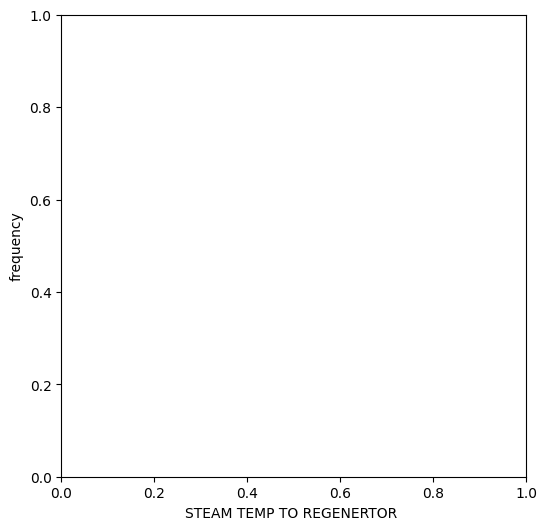

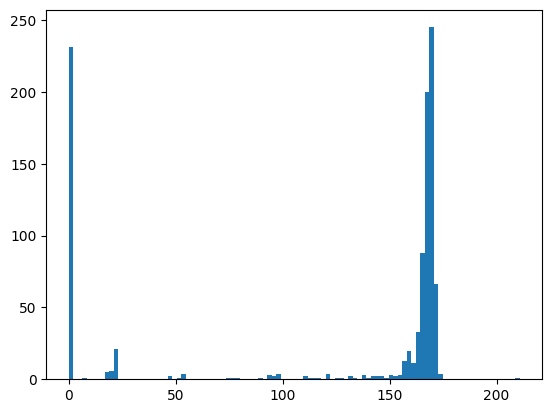

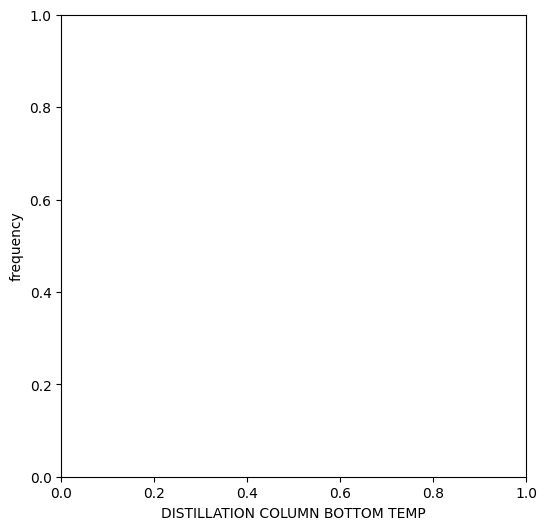

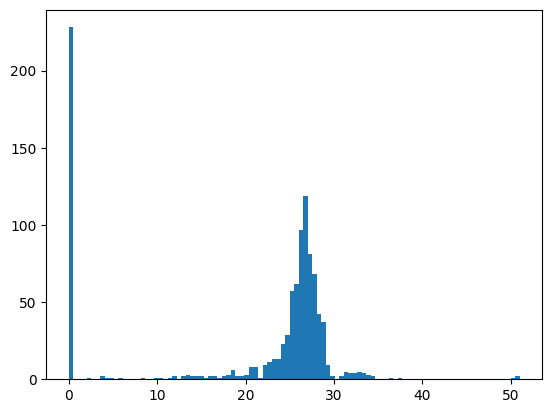

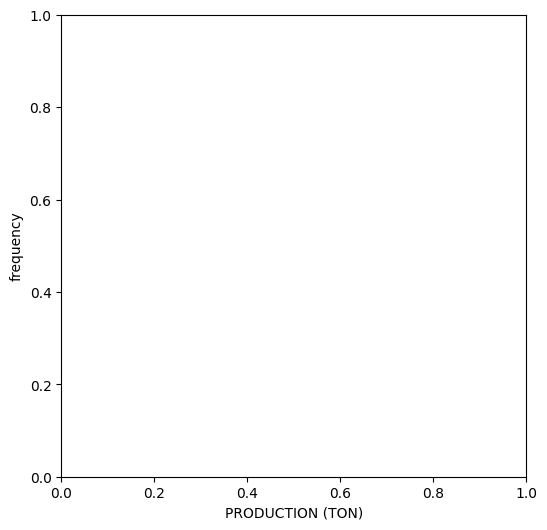

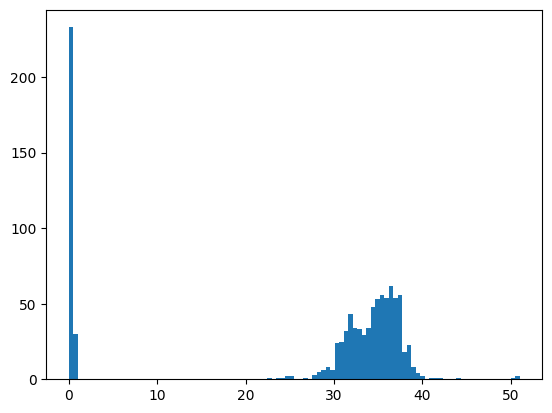

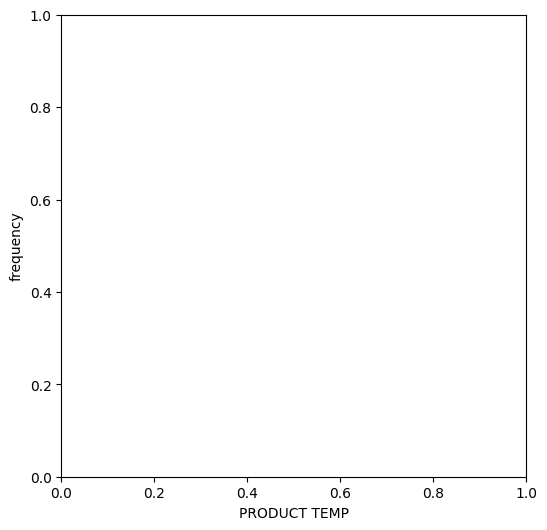

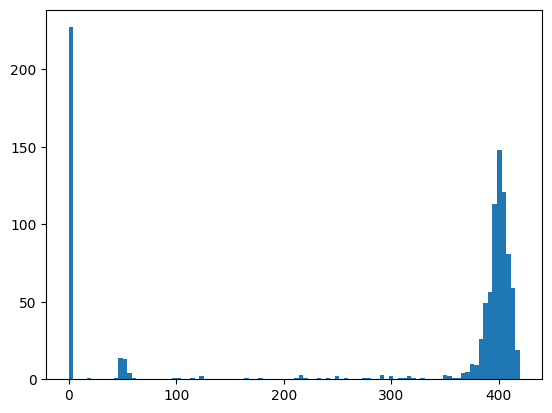

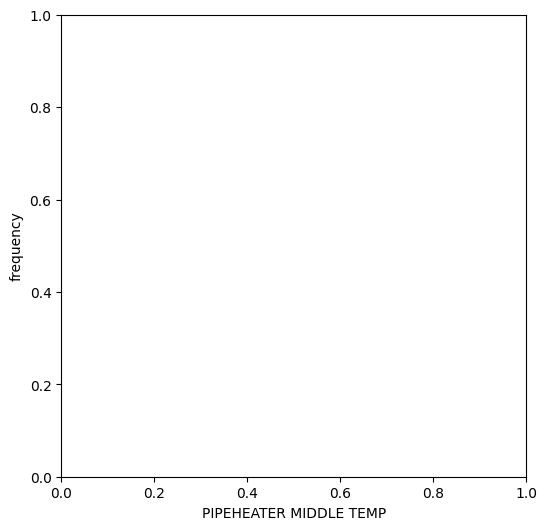

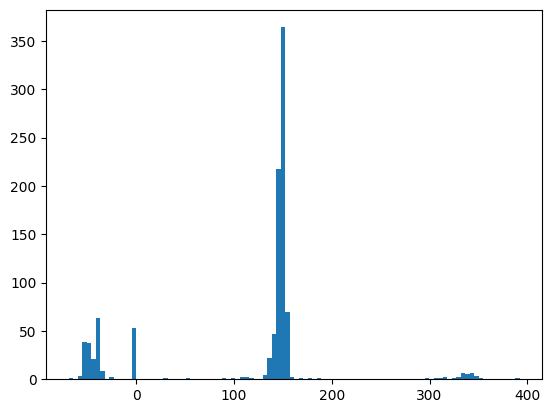

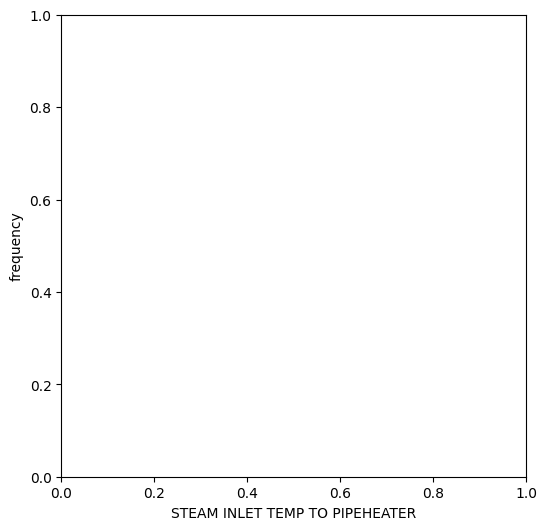

In [45]:
df3 = np.power(df1,3)
for i in df3 :
    plt.hist(df[i],bins = 100)
    plt.figure(figsize=(6,6))
    plt.xlabel(i)
    plt.ylabel("frequency")
    
    plt.show()

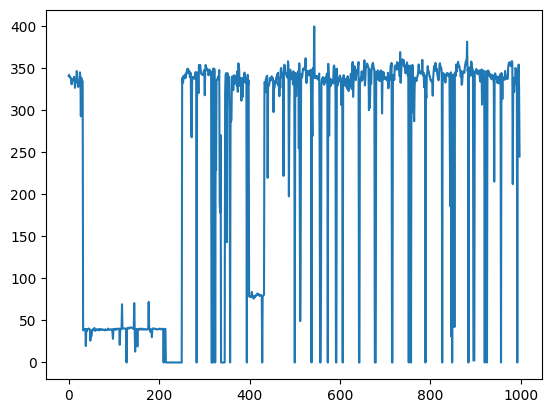

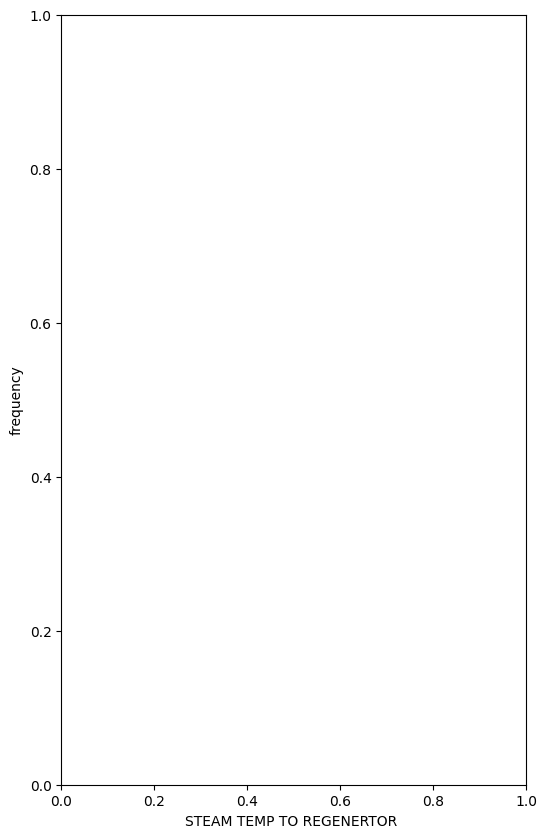

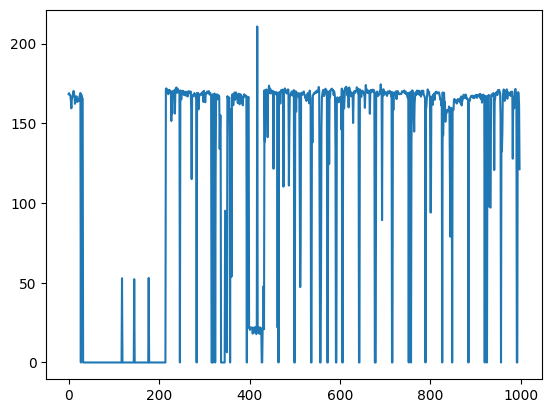

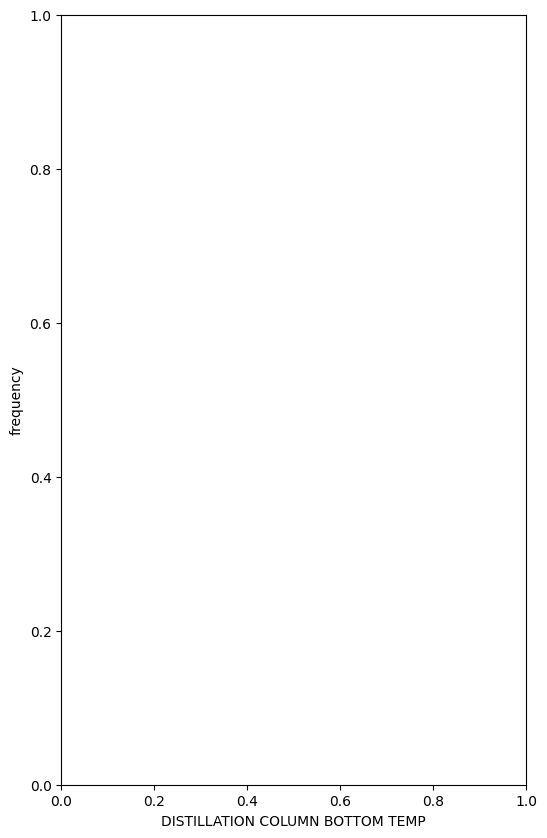

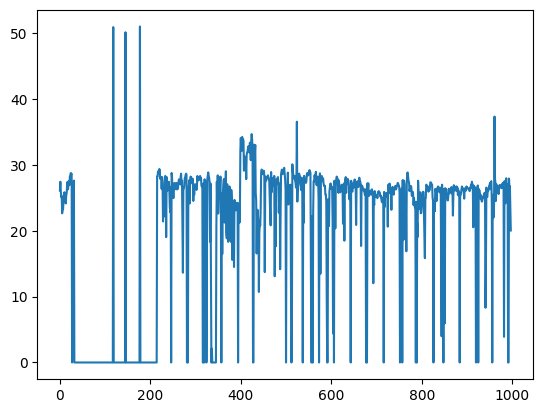

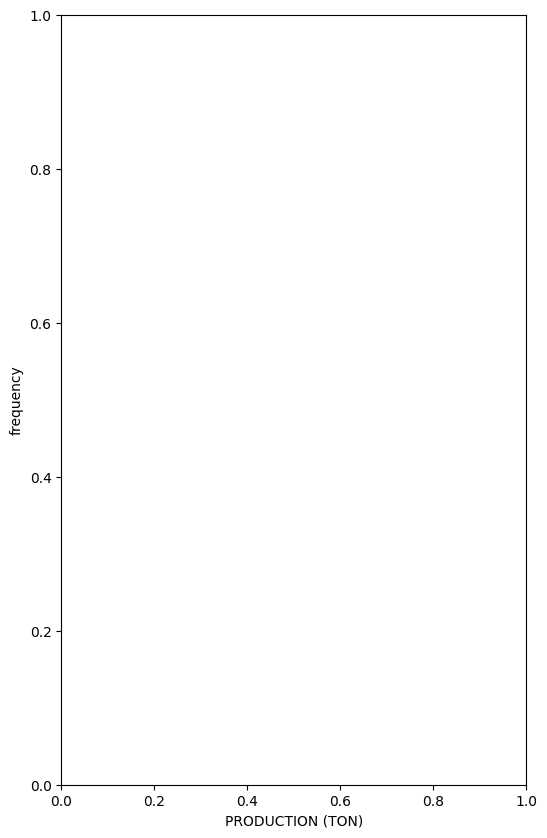

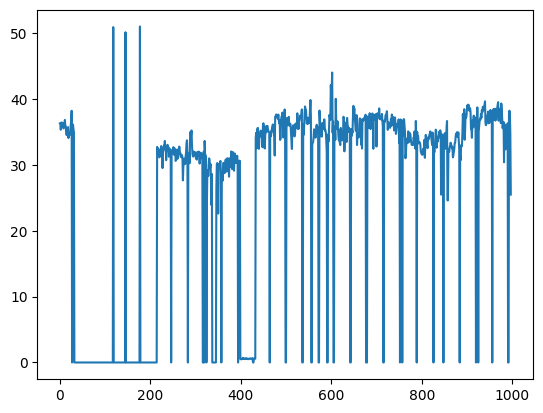

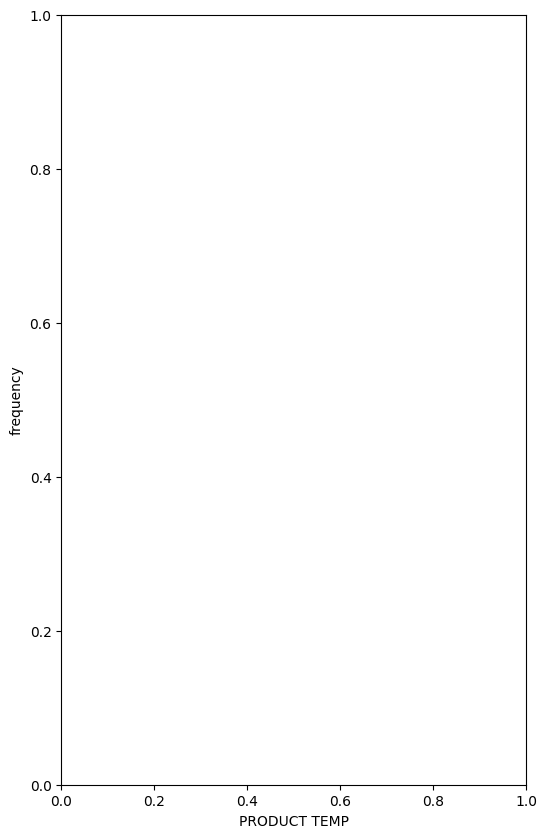

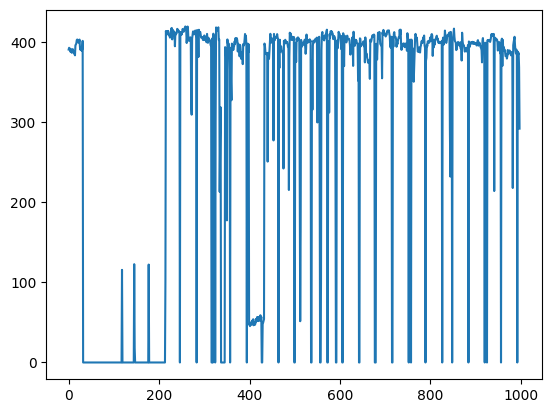

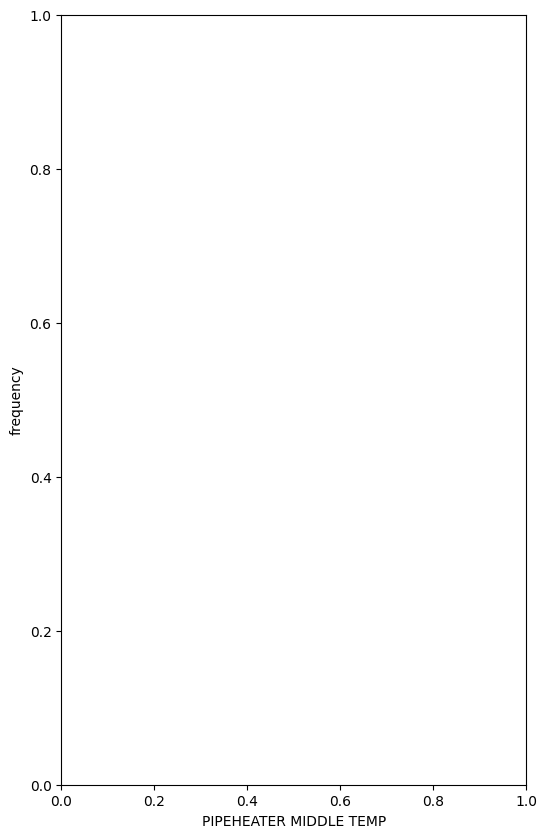

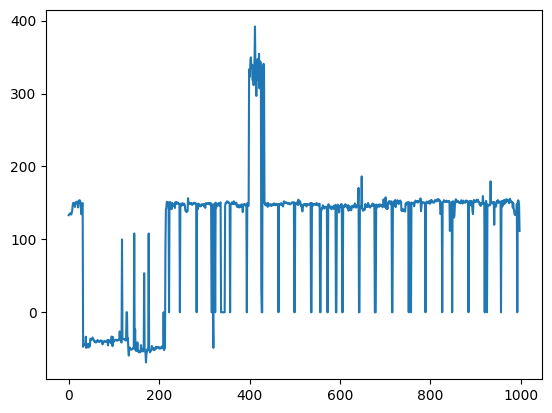

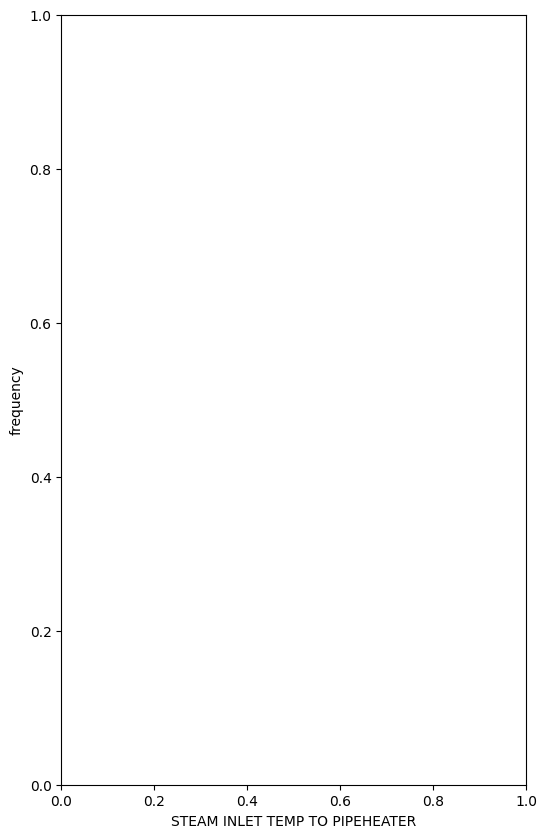

In [46]:
df3 = np.power(df1,3)
for i in df3 :
    plt.plot(df[i])
    plt.figure(figsize=(6,10))
    plt.xlabel(i)
    plt.ylabel("frequency")
    plt.show()

In [47]:
df3.skew()

STEAM TEMP TO REGENERTOR          -0.687332
DISTILLATION COLUMN BOTTOM TEMP   -0.827946
PRODUCTION (TON)                   3.066653
PRODUCT TEMP                      -0.211655
PIPEHEATER MIDDLE TEMP            -0.889128
STEAM INLET TEMP TO PIPEHEATER     5.214051
dtype: float64

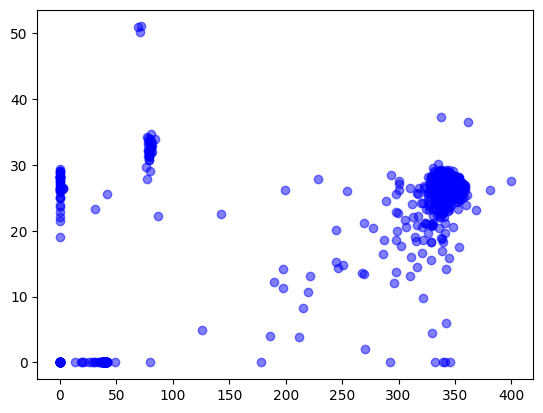

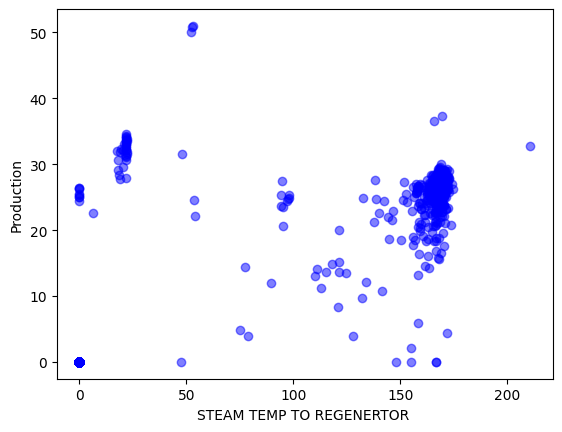

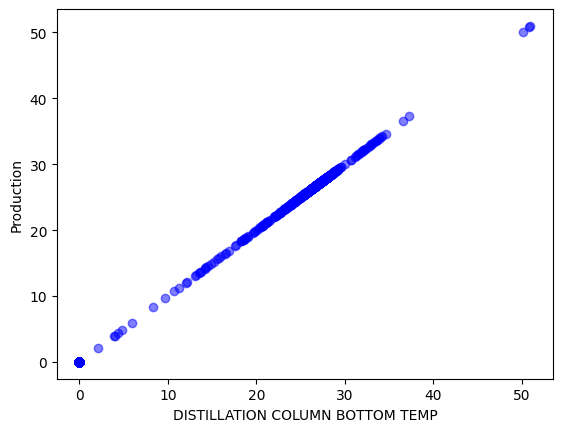

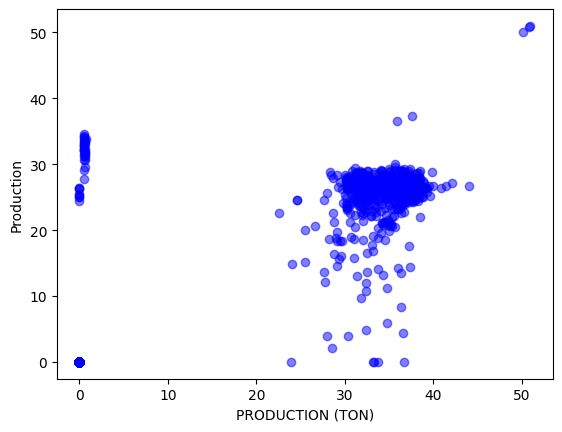

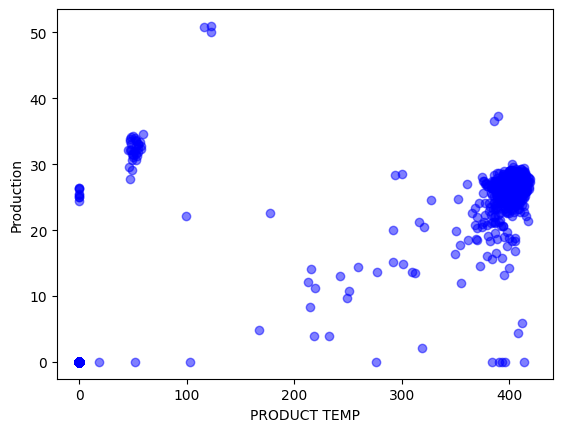

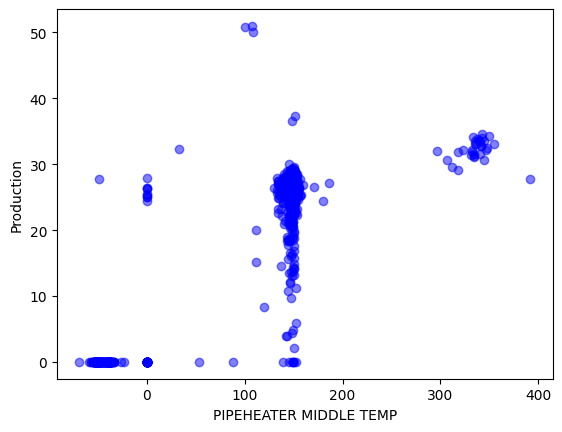

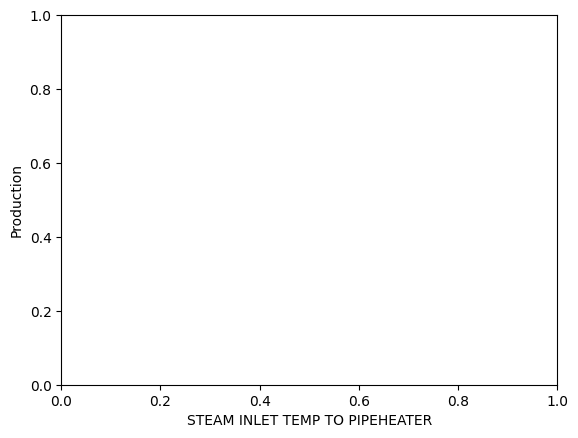

In [48]:

for i in df1 :
    plt.scatter(x = df1[i] , y = df["PRODUCTION (TON)"] ,c='blue', marker='o', alpha=0.5)
    plt.show()
    plt.xlabel(i)
    plt.ylabel("Production")

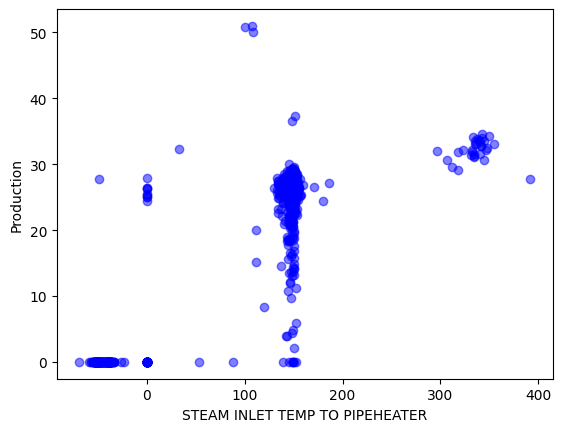

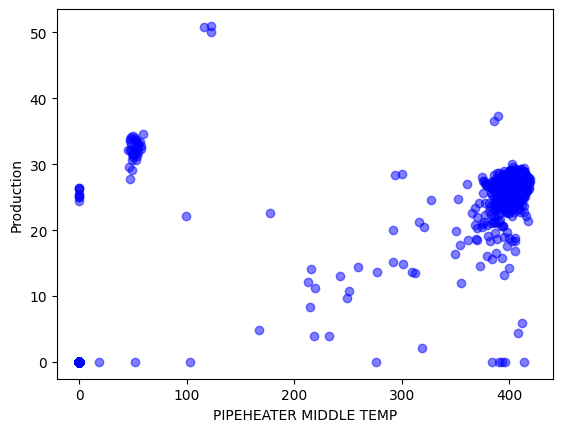

In [49]:
plt.scatter(x = df["STEAM INLET TEMP TO PIPEHEATER"] , y = df["PRODUCTION (TON)"] ,c='blue', marker='o', alpha=0.5)

plt.xlabel("STEAM INLET TEMP TO PIPEHEATER")
plt.ylabel("Production")
plt.show()

plt.scatter(x = df["PIPEHEATER MIDDLE TEMP"] , y = df["PRODUCTION (TON)"] ,c='blue', marker='o', alpha=0.5)

plt.xlabel("PIPEHEATER MIDDLE TEMP")
plt.ylabel("Production")
plt.show()



In [50]:
df1

,STEAM TEMP TO REGENERTOR,DISTILLATION COLUMN BOTTOM TEMP,PRODUCTION (TON),PRODUCT TEMP,PIPEHEATER MIDDLE TEMP,STEAM INLET TEMP TO PIPEHEATER
0,340.520000,168.220000,26.090000,36.290000,390.580000,133.110000
1,341.950000,168.920000,27.430000,36.200000,392.790000,134.120000
2,339.890000,168.180000,26.010000,35.320000,391.800000,134.660000
3,338.700000,167.700000,25.110000,36.400000,391.700000,135.750000
4,339.000000,167.000000,25.290000,36.300000,387.900000,135.330000
...,...,...,...,...,...,...
993,339.770000,168.710000,27.910000,37.770000,387.970000,152.140000
994,339.780000,169.560000,26.330000,38.210000,384.100000,153.580000
995,354.160000,168.840000,26.750000,37.730000,386.410000,152.500000
996,324.590000,161.190000,23.290000,34.540000,367.980000,146.110000


In [51]:
X = df1.iloc[1:,[0,1,3]]
X[X == '.1.83'] = np.nan


y = df1.iloc[1:,2]
y[y == '.1.83'] = np.nan

# Convert X to float array
X = X.astype(float)



# Convert y to float array
y = y.astype(float)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,  test_size=0.2, random_state=42)


dt = LinearRegression()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
r_mse = mean_squared_error(y_test, dt_pred)
r_r2 = r2_score(y_test, dt_pred)

print("regression- Mean Squared Error:", r_mse)
print("regression - R^2 Score:", r_r2)

d = KNeighborsRegressor()
d.fit(X1_train, y1_train)

d_pred = d.predict(X1_test)
d_mse = mean_squared_error(y1_test, d_pred)
d_r2 = r2_score(y1_test, d_pred)

print("KNN- Mean Squared Error:", d_mse)
print("KNN - R^2 Score:", d_r2)

r = RandomForestRegressor()
r.fit(X1_train, y1_train)

r_pred = r.predict(X1_test)
r_mse = mean_squared_error(y1_test, d_pred)
d_r2 = r2_score(y1_test, d_pred)

print("Random Forest- Mean Squared Error:", r_mse)
print("Random Forest - R^2 Score:", r_r2)




# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
dt_y_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)



print("Decision Tree - Mean Squared Error corr > 0.7:", dt_mse)
print("Decision Tree - R^2 Score corr > 0.7:", dt_r2)

regression- Mean Squared Error: 53.719637899639835
regression - R^2 Score: 0.565214613688513
KNN- Mean Squared Error: 22.03091239721924
KNN - R^2 Score: 0.8076614357476062
Random Forest- Mean Squared Error: 22.03091239721924
Random Forest - R^2 Score: 0.565214613688513
Decision Tree - Mean Squared Error corr > 0.7: 22.16104472546104
Decision Tree - R^2 Score corr > 0.7: 0.8206373168406945


In [52]:
#corr < 0

correlation_threshold = 0
correlation_with_production = df.corr()["PRODUCTION (TON)"]
columns_above_threshold = correlation_with_production[correlation_with_production < correlation_threshold].index

df4 = df[columns_above_threshold]




In [53]:
df4.corr()

,BENZOL WASHER INLET OIL TEMP,DISTILLATION COLUMN MIDDLE TEMP,STEAM FLOW TO REGENERATOR (T/hr),DISTILLATION COLUMN TOP TEMP
BENZOL WASHER INLET OIL TEMP,1.000000,0.049858,0.235598,0.419018
DISTILLATION COLUMN MIDDLE TEMP,0.049858,1.000000,0.052861,0.043333
STEAM FLOW TO REGENERATOR (T/hr),0.235598,0.052861,1.000000,0.712699
DISTILLATION COLUMN TOP TEMP,0.419018,0.043333,0.712699,1.000000


In [54]:
df4.skew()

BENZOL WASHER  INLET OIL TEMP       -0.228614
DISTILLATION COLUMN MIDDLE TEMP     29.944736
STEAM FLOW TO REGENERATOR (T/hr)     1.840552
DISTILLATION COLUMN TOP TEMP         1.484095
dtype: float64

In [55]:
df4.iloc[1:,1] = np.power(df4.iloc[1:,1],0.5)

C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_4316\3970279370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.iloc[1:,1] = np.power(df4.iloc[1:,1],0.5)


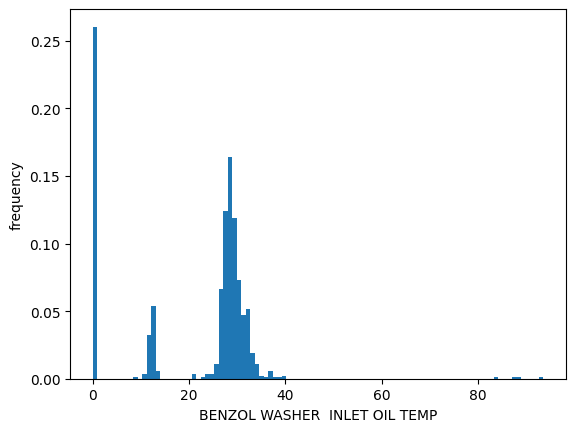

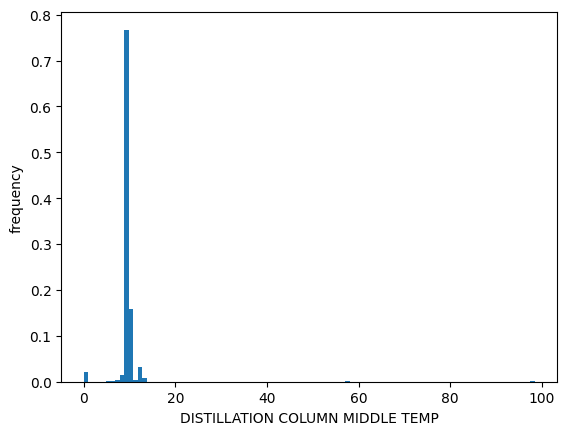

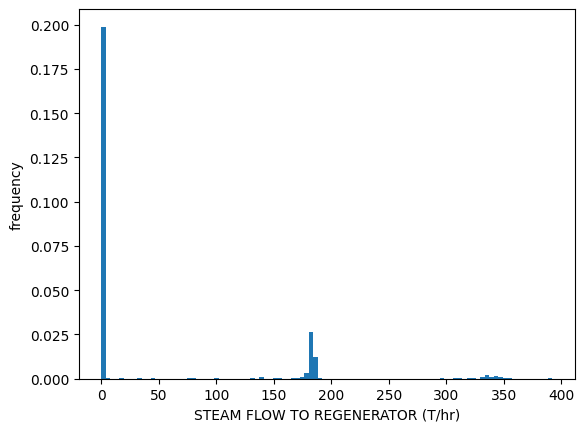

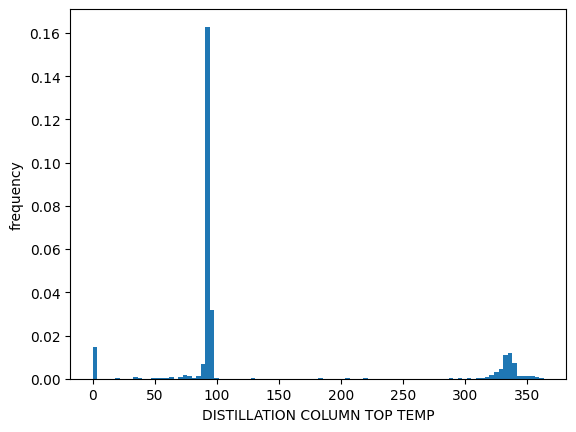

In [56]:
for i in df4 :
    plt.hist(df4[i],bins = 100,density = True)
    plt.xlabel(i)
    plt.ylabel("frequency")
    
    plt.show()

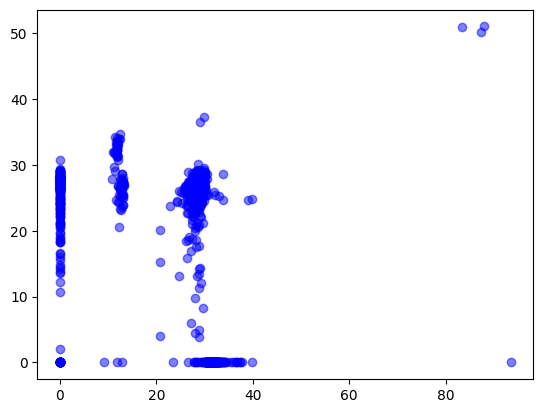

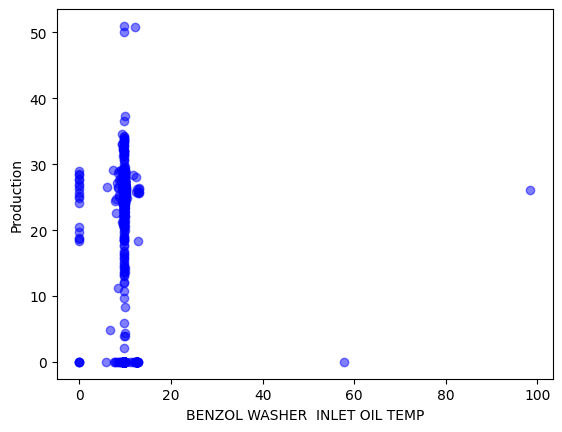

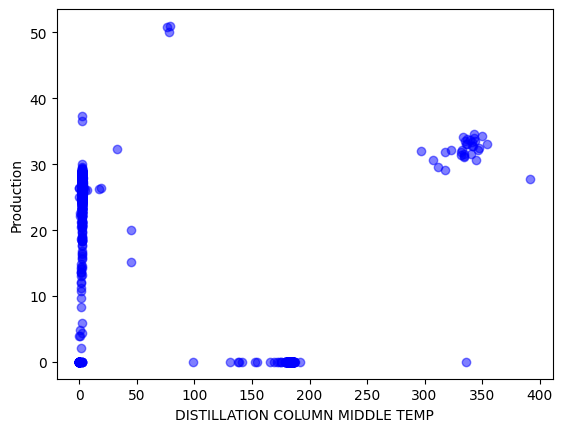

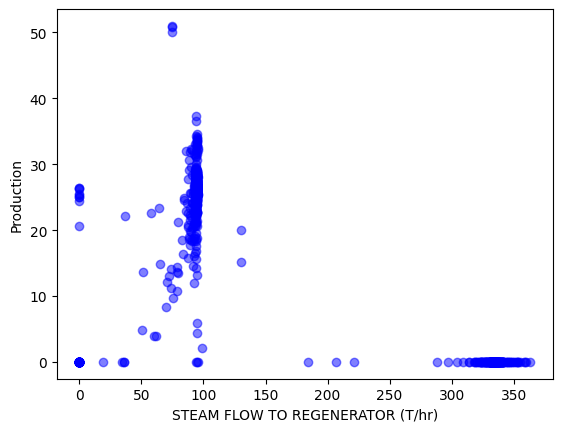

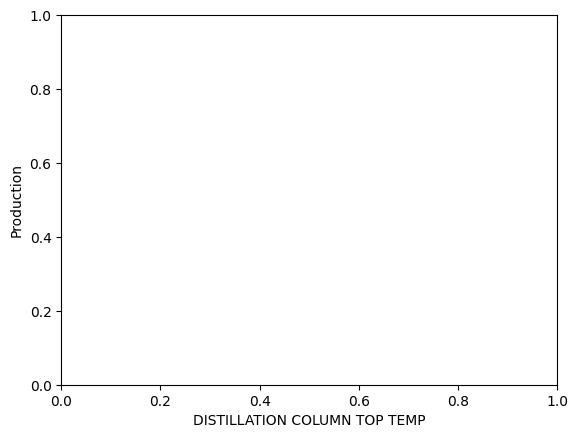

In [57]:


for i in df4 :
    plt.scatter(x = df4[i] , y = df["PRODUCTION (TON)"], c='blue', marker='o', alpha=0.5)
    plt.show()
    plt.xlabel(i)
    plt.ylabel("Production")

In [58]:
X = df4.iloc[1:,[0,1,2,3]]
X[X == '.1.83'] = np.nan


y = df1.iloc[1:,2]
y[y == '.1.83'] = np.nan

# Convert X to float array
X = X.astype(float)



# Convert y to float array
y = y.astype(float)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

dt = LinearRegression()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
r_mse = mean_squared_error(y_test, dt_pred)
r_r2 = r2_score(y_test, dt_pred)

print("regression- Mean Squared Error:", dt_mse)
print("regression - R^2 Score:", dt_r2)

d = KNeighborsRegressor()
d.fit(X_train, y_train)

d_pred = d.predict(X_test)
d_mse = mean_squared_error(y_test, d_pred)
d_r2 = r2_score(y_test, d_pred)

print("KNN- Mean Squared Error:", d_mse)
print("KNN - R^2 Score:", d_r2)

r = RandomForestRegressor()
r.fit(X_train, y_train)

r_pred = r.predict(X_test)
r_mse = mean_squared_error(y_test, d_pred)
d_r2 = r2_score(y_test, d_pred)

print("Random Forest- Mean Squared Error:", r_mse)
print("Random Forest - R^2 Score:", r_r2)


# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
dt_y_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)



print("Decision Tree - Mean Squared Error < 0:", dt_mse)
print("Decision Tree - R^2 Score <0:", dt_r2)

regression- Mean Squared Error: 22.16104472546104
regression - R^2 Score: 0.8206373168406945
KNN- Mean Squared Error: 22.42206636
KNN - R^2 Score: 0.818524711531986
Random Forest- Mean Squared Error: 22.42206636
Random Forest - R^2 Score: 0.5473791987292058
Decision Tree - Mean Squared Error < 0: 22.562766999999997
Decision Tree - R^2 Score <0: 0.8173859365046681


In [59]:
df2.skew()

STEAM TEMP TO REGENERTOR          -0.840582
DISTILLATION COLUMN BOTTOM TEMP   -0.986444
PRODUCTION (TON)                  -0.999648
PRODUCT TEMP                      -0.982708
PIPEHEATER MIDDLE TEMP            -1.021073
STEAM INLET TEMP TO PIPEHEATER    -0.543360
dtype: float64

In [60]:
df5 = np.power(df2,0.5)

In [61]:
df5.skew()

STEAM TEMP TO REGENERTOR          -1.080611
DISTILLATION COLUMN BOTTOM TEMP   -1.083641
PRODUCTION (TON)                  -1.196355
PRODUCT TEMP                      -1.058482
PIPEHEATER MIDDLE TEMP            -1.111549
STEAM INLET TEMP TO PIPEHEATER    -2.507194
dtype: float64

In [62]:
df5.head()

,STEAM TEMP TO REGENERTOR,DISTILLATION COLUMN BOTTOM TEMP,PRODUCTION (TON),PRODUCT TEMP,PIPEHEATER MIDDLE TEMP,STEAM INLET TEMP TO PIPEHEATER
0,18.453184,12.969965,5.107837,6.024118,19.763097,11.537331
1,18.491890,12.996923,5.237366,6.016644,19.818930,11.581019
2,18.436106,12.968423,5.100000,5.943063,19.793938,11.604310
3,18.403804,12.949903,5.010988,6.033241,19.791412,11.651180
4,18.411953,12.922848,5.028916,6.024948,19.695177,11.633142


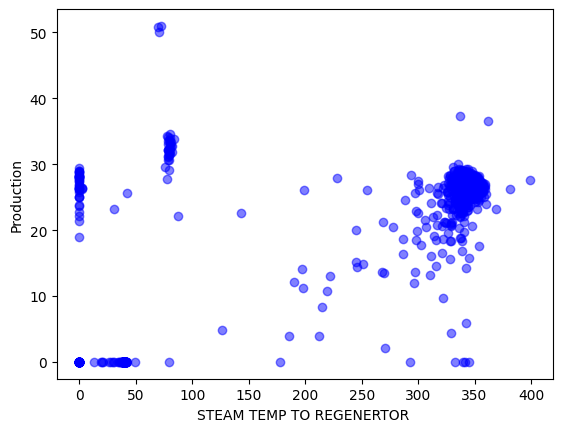

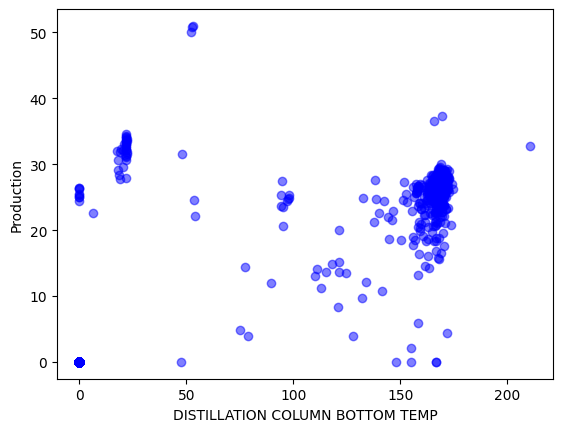

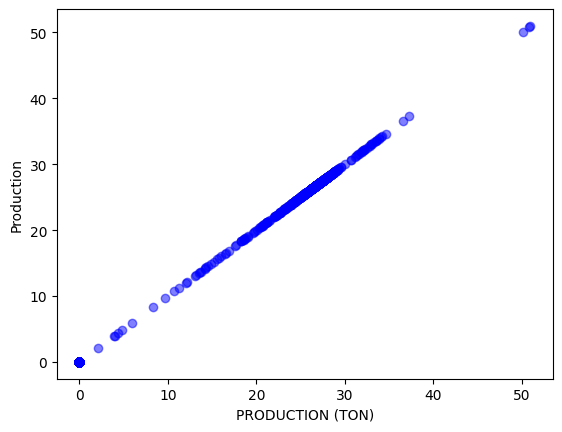

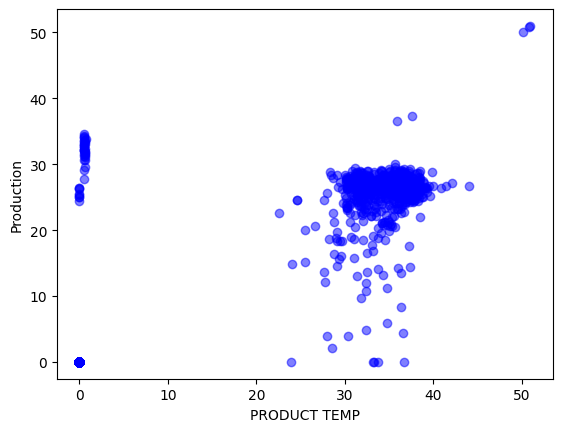

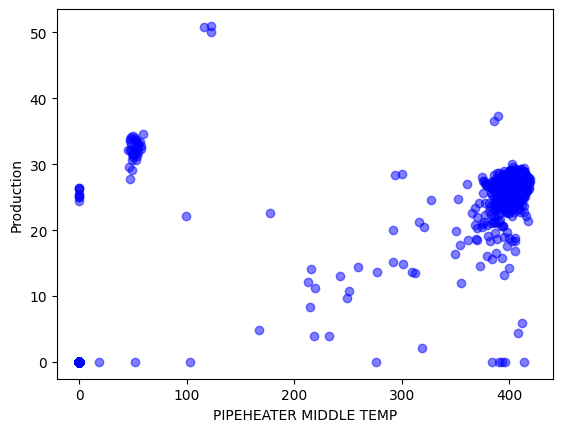

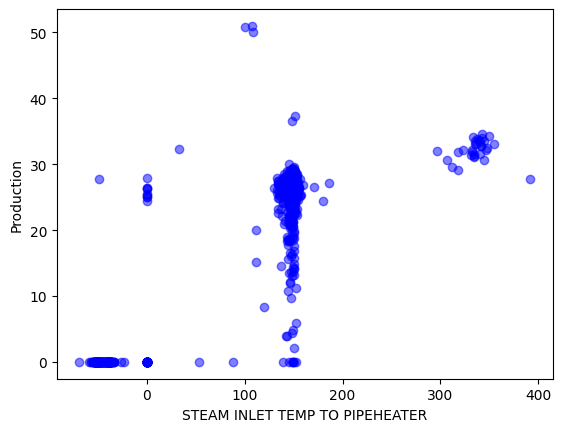

In [63]:


for i in df2 :
    
    plt.scatter(x = df2[i] , y = df["PRODUCTION (TON)"] ,c='blue', marker='o', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel("Production")
    plt.show()

In [64]:
X = df2.iloc[1:,[0,1,2,3,5]]
X[X == '.1.83'] = np.nan


y = df1.iloc[1:,2]
y[y == '.1.83'] = np.nan

# Convert X to float array
X = X.astype(float)



# Convert y to float array
y = y.astype(float)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

dt = LinearRegression()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
r_mse = mean_squared_error(y_test, dt_pred)
r_r2 = r2_score(y_test, dt_pred)

print("regression- Mean Squared Error:", dt_mse)
print("regression - R^2 Score:", dt_r2)

d = KNeighborsRegressor()
d.fit(X_train, y_train)

d_pred = d.predict(X_test)
d_mse = mean_squared_error(y_test, d_pred)
d_r2 = r2_score(y_test, d_pred)

print("KNN- Mean Squared Error:", d_mse)
print("KNN - R^2 Score:", d_r2)

r = RandomForestRegressor()
r.fit(X_train, y_train)

r_pred = r.predict(X_test)
r_mse = mean_squared_error(y_test, d_pred)
d_r2 = r2_score(y_test, d_pred)

print("Random Forest- Mean Squared Error:", r_mse)
print("Random Forest - R^2 Score:", r_r2)





# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
dt_y_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)



print("Decision Tree - Mean Squared Error 0.5:", dt_mse)
print("Decision Tree - R^2 Score 0.5:", dt_r2)

regression- Mean Squared Error: 22.562766999999997
regression - R^2 Score: 0.8173859365046681
KNN- Mean Squared Error: 12.577003979999999
KNN - R^2 Score: 0.8982067313204642
Random Forest- Mean Squared Error: 12.577003979999999
Random Forest - R^2 Score: 1.0
Decision Tree - Mean Squared Error 0.5: 1.8912929999999997
Decision Tree - R^2 Score 0.5: 0.9846926265741132


In [65]:
(df.corr())["PRODUCTION (TON)"]

BENZOL WASHER INLET GAS TEMP        0.446713
BENZOL WASHER  INLET OIL TEMP      -0.173334
RICH OIL FLOW(M3/hr)                0.037236
DISTILLATION COLUMN MIDDLE TEMP    -0.075950
STEAM FLOW TO REGENERATOR (T/hr)   -0.512630
STEAM TEMP TO REGENERTOR            0.728643
DISTILLATION COLUMN TOP TEMP       -0.682263
DISTILLATION COLUMN BOTTOM TEMP     0.820663
PRODUCTION (TON)                    1.000000
PRODUCT TEMP                        0.810745
PIPEHEATER MIDDLE TEMP              0.820891
STEAM INLET TEMP TO PIPEHEATER      0.871299
Name: PRODUCTION (TON), dtype: float64

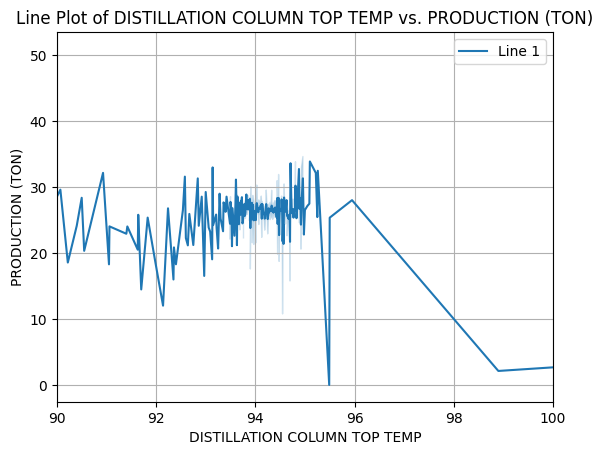

In [66]:

# Create the first line plot
sns.lineplot(x=df["DISTILLATION COLUMN TOP TEMP"], y=df["PRODUCTION (TON)"], label="Line 1")

# Create the second line plot
#sns.lineplot(x=df["DISTILLATION COLUMN TOP TEMP"], y=df["PRODUCTION (TON)"], label="Line 2")  # Replace 'second_dataset' with your actual data
plt.xlim(90,100)
plt.xlabel("DISTILLATION COLUMN TOP TEMP")
plt.ylabel("PRODUCTION (TON)")
plt.title("Line Plot of DISTILLATION COLUMN TOP TEMP vs. PRODUCTION (TON)")

# Add a legend to differentiate between the two lines
plt.legend()

plt.grid(True)  # Optionally, add gridlines
plt.show()

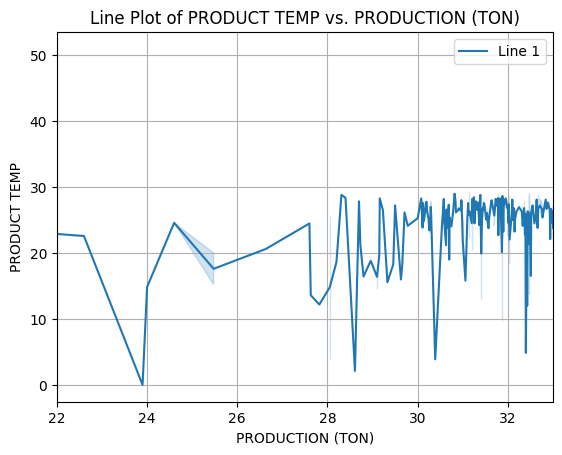

In [67]:

# Create the first line plot
sns.lineplot(y=df["PRODUCTION (TON)"], x=df["PRODUCT TEMP"], label="Line 1")

# Create the second line plot
#sns.lineplot(x=df["PRODUCTION (TON)"], y=df["PRODUCT TEMP"], label="Line 2")  # Replace 'second_dataset' with your actual data
plt.xlim(22,33)
plt.xlabel("PRODUCTION (TON)")
plt.ylabel("PRODUCT TEMP")
plt.title("Line Plot of PRODUCT TEMP vs. PRODUCTION (TON)")

# Add a legend to differentiate between the two lines
plt.legend()

plt.grid(True)  # Optionally, add gridlines
plt.show()

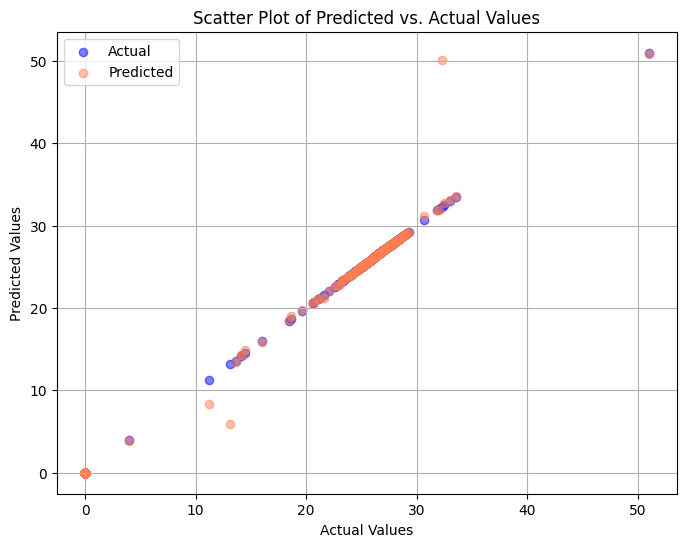

In [68]:

plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# Scatter plot for actual values in blue
plt.scatter(y_test, y_test, c='blue', label='Actual', marker='o', alpha=0.5)

# Scatter plot for predicted values in coral
plt.scatter(y_test, dt_y_pred, c='coral', label='Predicted', marker='o', alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')

# Optionally, you can add a diagonal line for reference
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black')

# Add a legend
plt.legend()

plt.grid(True)  # Add grid lines (optional)

plt.show()  # Display the scatter plot


In [69]:
X = df.iloc[1:,[0,1,2,3,4,5,6,7,8,10]]
X[X == '.1.83'] = np.nan


y = df.iloc[1:,9]
y[y == '.1.83'] = np.nan

# Convert X to float array
X = X.astype(float)



# Convert y to float array
y = y.astype(float)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

dt = LinearRegression()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
r_mse = mean_squared_error(y_test, dt_pred)
r_r2 = r2_score(y_test, dt_pred)

print("regression- Mean Squared Error:", dt_mse)
print("regression - R^2 Score:", dt_r2)

d = KNeighborsRegressor()
d.fit(X_train, y_train)

d_pred = d.predict(X_test)
d_mse = mean_squared_error(y_test, d_pred)
d_r2 = r2_score(y_test, d_pred)

print("KNN- Mean Squared Error:", d_mse)
print("KNN - R^2 Score:", d_r2)

r = RandomForestRegressor()
r.fit(X_train, y_train)

r_pred = r.predict(X_test)
r_mse = mean_squared_error(y_test, d_pred)
d_r2 = r2_score(y_test, d_pred)

print("Random Forest- Mean Squared Error:", r_mse)
print("Random Forest - R^2 Score:", r_r2)



# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
dt_y_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)



print("Decision Tree - Mean Squared Error:", dt_mse)
print("Decision Tree - R^2 Score:", dt_r2)

regression- Mean Squared Error: 1.8912929999999997
regression - R^2 Score: 0.9846926265741132
KNN- Mean Squared Error: 5.14873264
KNN - R^2 Score: 0.9766287755785393
Random Forest- Mean Squared Error: 5.14873264
Random Forest - R^2 Score: 0.95711076735944
Decision Tree - Mean Squared Error: 4.262351499999999
Decision Tree - R^2 Score: 0.9806522535864963


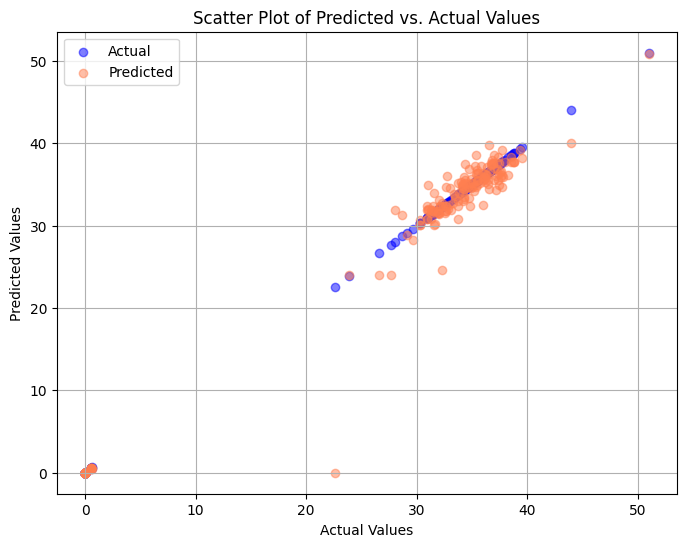

In [70]:

plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# Scatter plot for actual values in blue
plt.scatter(y_test, y_test, c='blue', label='Actual', marker='o', alpha=0.5)

# Scatter plot for predicted values in coral
plt.scatter(y_test, dt_y_pred, c='coral', label='Predicted', marker='o', alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')

# Optionally, you can add a diagonal line for reference
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black')

# Add a legend
plt.legend()

plt.grid(True)  # Add grid lines (optional)

plt.show()  # Display the scatter plot

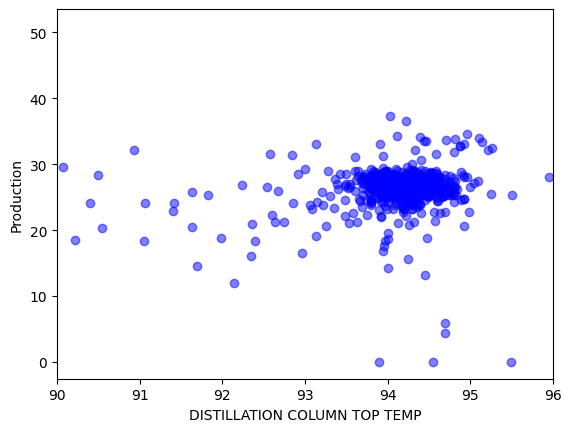

In [71]:
plt.scatter(x = df["DISTILLATION COLUMN TOP TEMP"] , y = df["PRODUCTION (TON)"] ,c='blue', marker='o', alpha=0.5)
plt.xlim(90,96)
plt.xlabel("DISTILLATION COLUMN TOP TEMP")
plt.ylabel("Production")
plt.show()

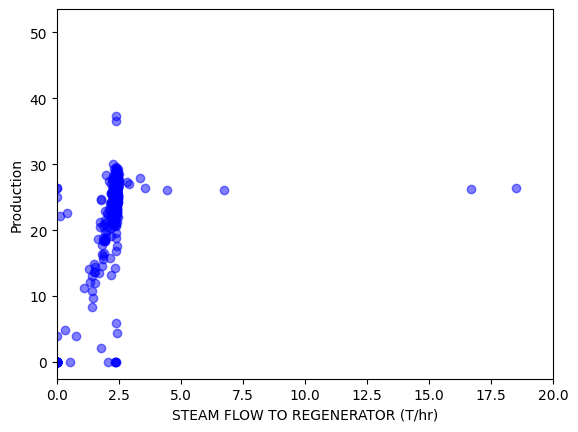

In [72]:
plt.scatter(x = df["STEAM FLOW TO REGENERATOR (T/hr)"] , y = df["PRODUCTION (TON)"] ,c='blue', marker='o', alpha=0.5)
plt.xlim(0,20)
plt.xlabel("STEAM FLOW TO REGENERATOR (T/hr)")
plt.ylabel("Production")
plt.show()

TypeError: 'Axes' object is not subscriptable

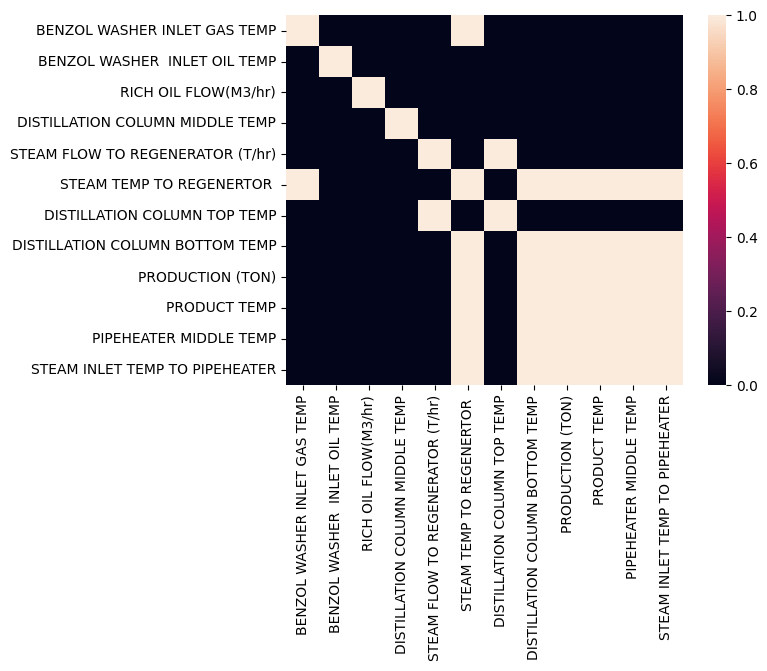

In [73]:
sns.heatmap(df.corr() > 0.5)["PRODUCTION (TON)"]

In [ ]:
(df.corr() < 0 )["PRODUCTION (TON)"]

In [ ]:
X = df.iloc[1:,[1,3,4,6]]
X[X == '.1.83'] = np.nan


y = df.iloc[1:,8]
y[y == '.1.83'] = np.nan

# Convert X to float array
X = X.astype(float)



# Convert y to float array
y = y.astype(float)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

dt = LinearRegression()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
r_mse = mean_squared_error(y_test, dt_pred)
r_r2 = r2_score(y_test, dt_pred)

print("regression- Mean Squared Error:", dt_mse)
print("regression - R^2 Score:", dt_r2)

d = KNeighborsRegressor()
d.fit(X_train, y_train)

d_pred = d.predict(X_test)
d_mse = mean_squared_error(y_test, d_pred)
d_r2 = r2_score(y_test, d_pred)

print("KNN- Mean Squared Error:", d_mse)
print("KNN - R^2 Score:", d_r2)

r = RandomForestRegressor()
r.fit(X_train, y_train)

r_pred = r.predict(X_test)
r_mse = mean_squared_error(y_test, d_pred)
d_r2 = r2_score(y_test, d_pred)

print("Random Forest- Mean Squared Error:", r_mse)
print("Random Forest - R^2 Score:", r_r2)



# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
dt_y_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)



print("Decision Tree - Mean Squared Error>0:", dt_mse)
print("Decision Tree - R^2 Score:>0", dt_r2)